<a href="https://www.kaggle.com/code/invalid00/credit-card-churn?scriptVersionId=190236212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [13]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv"
)

In [14]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df.drop(columns=["RowNumber"], axis=1,inplace=True)

In [16]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.duplicated().sum()



0

In [18]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited'>

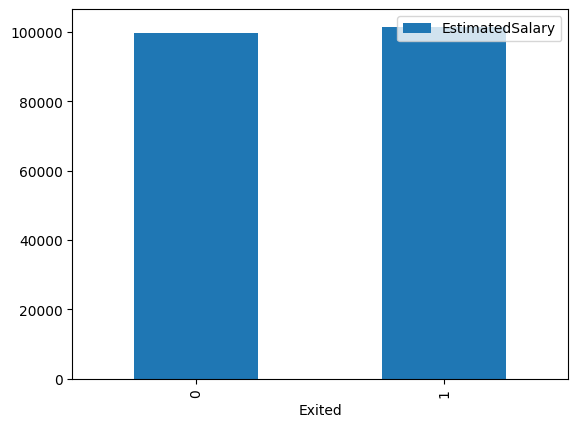

In [21]:
df.groupby(df.Exited).agg({"EstimatedSalary":"mean"},{"Balance":"mean"},{"CreditScore":"mean"}).plot(kind="bar")

In [22]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

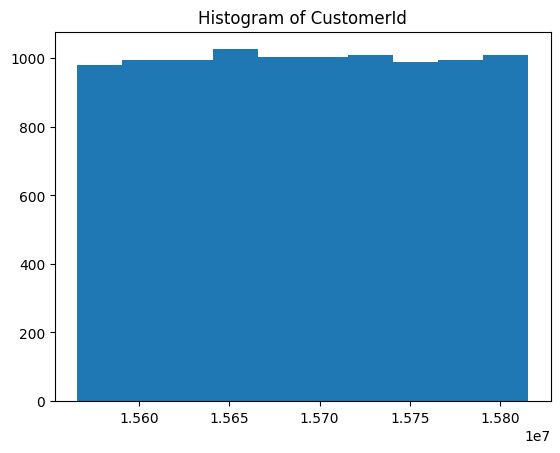

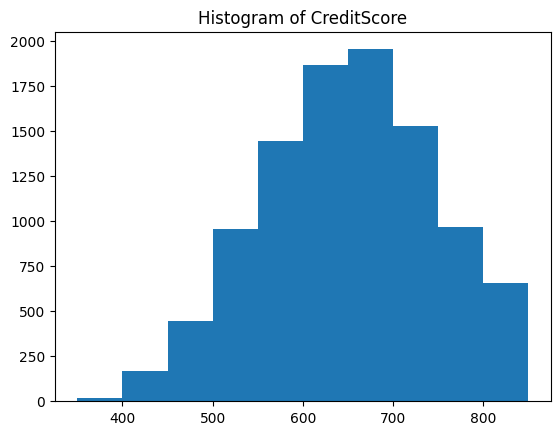

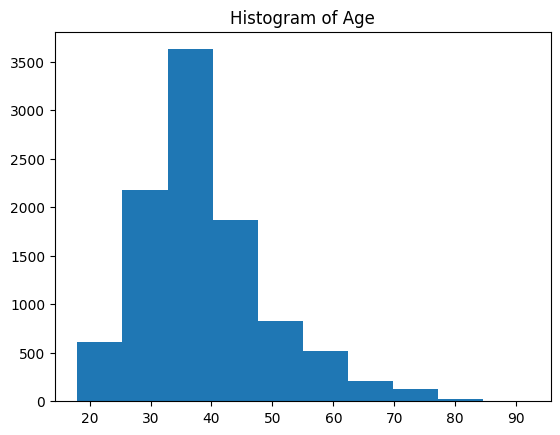

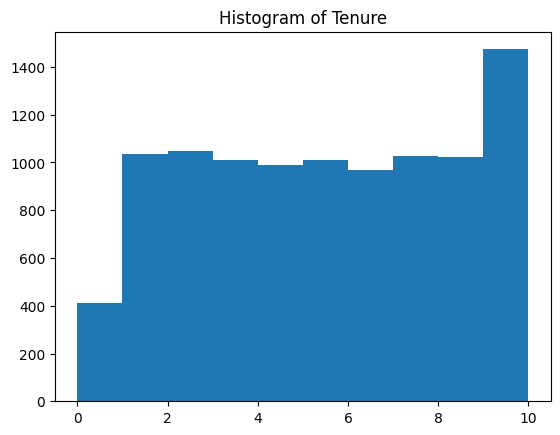

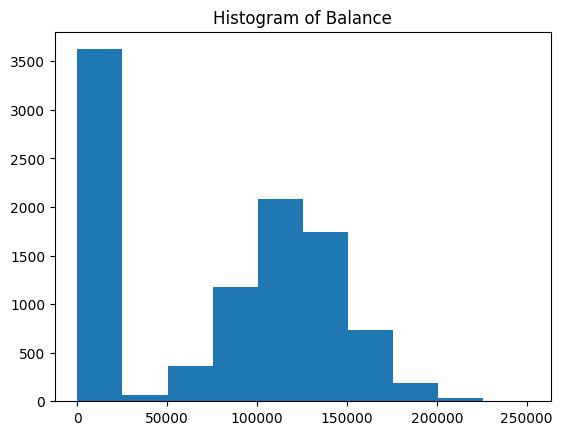

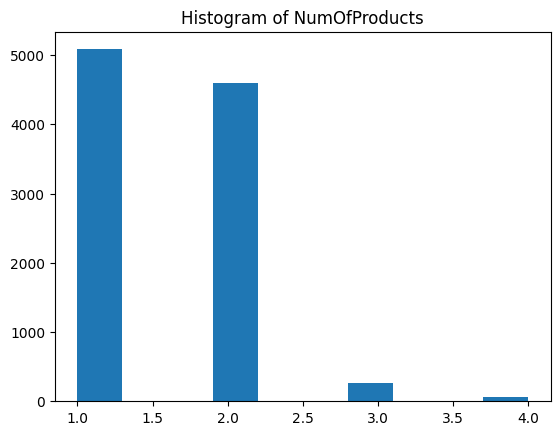

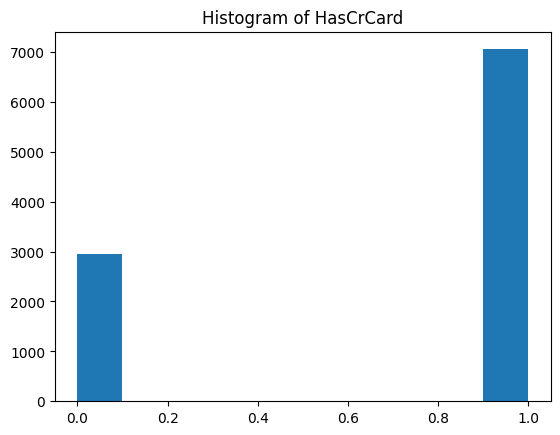

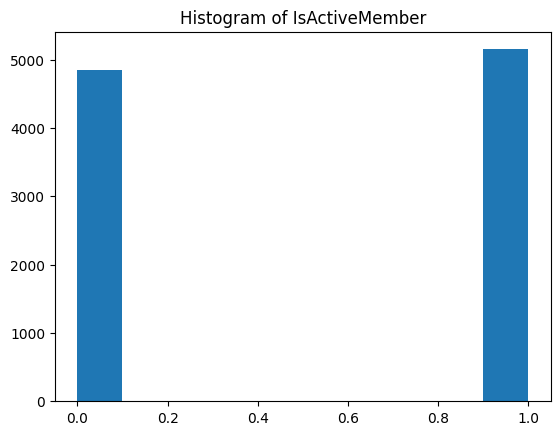

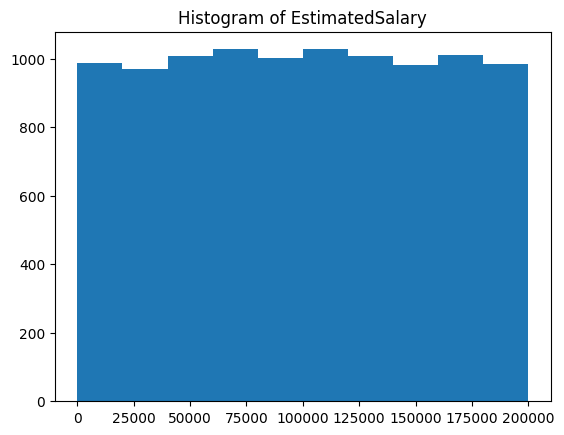

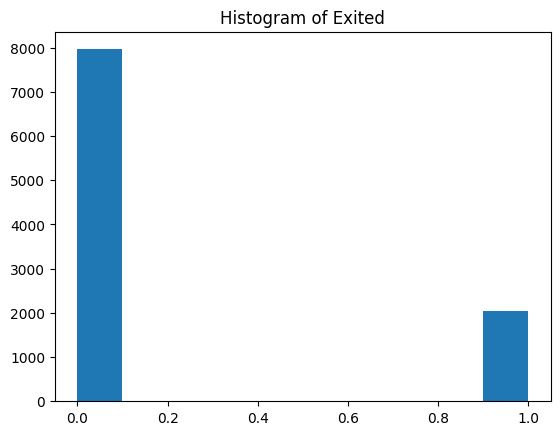

In [23]:
import matplotlib.pyplot as plt

for i in df.columns:
    if df[i].dtypes != object:
        ax=plt.hist(df[i])
        plt.title(f"Histogram of {i}")

        plt.show()


<Axes: xlabel='Exited'>

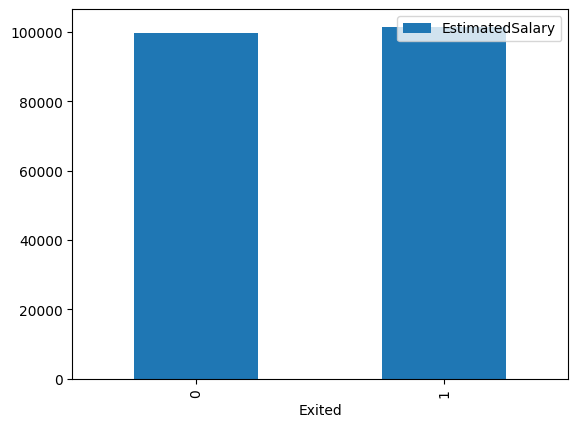

In [24]:
df.groupby(df.Exited).agg({"EstimatedSalary":"mean"},{"CreditScore":"mean"}).plot(kind="bar")

<Axes: ylabel='count'>

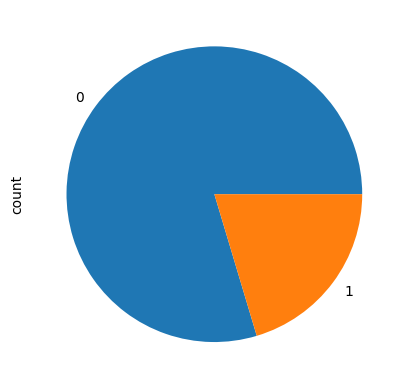

In [25]:
df["Exited"].value_counts().plot(kind ="pie" , )

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

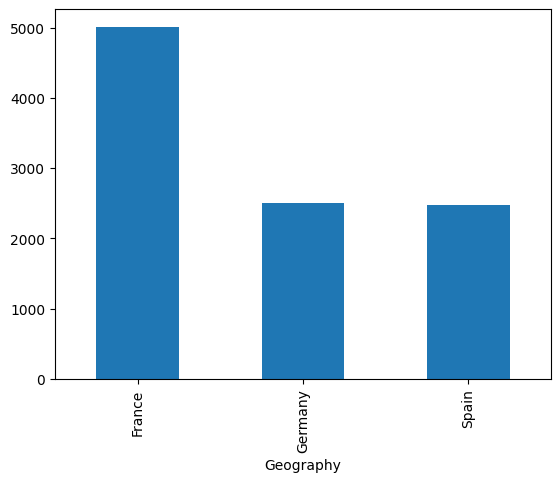

In [26]:
df["Geography"].value_counts().plot(kind="bar")
df["Geography"].value_counts()

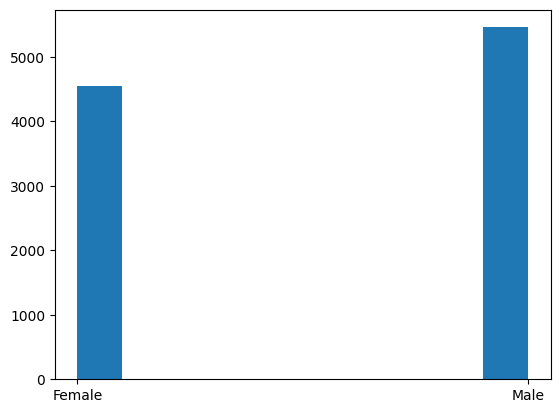

In [27]:
plt.hist(df["Gender"])
plt.show()

<BarContainer object of 10000 artists>

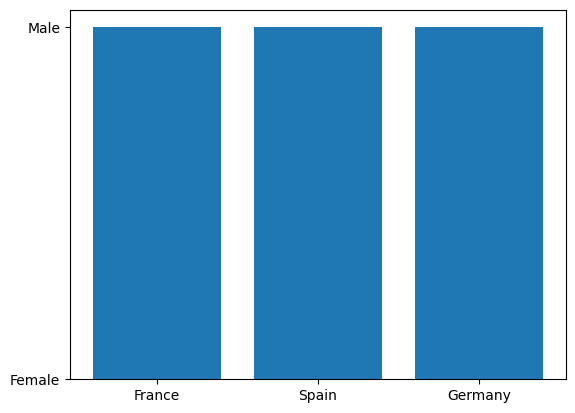

In [28]:
plt.bar(data=df,height=df["Gender"],x=df["Geography"])


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


<Axes: xlabel='Gender'>

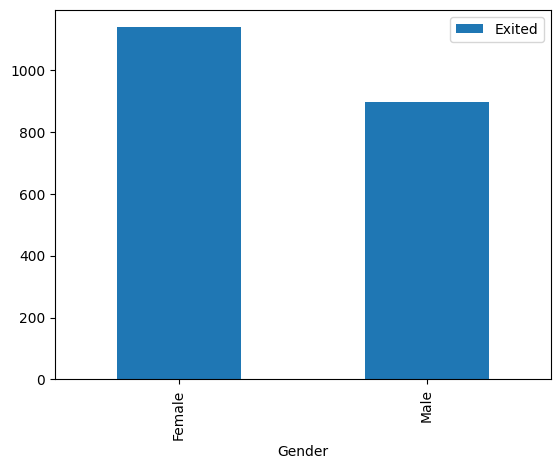

In [30]:
df.groupby(df.Gender).agg({"Exited":"sum"}).plot(kind="bar")

<Axes: xlabel='Gender'>

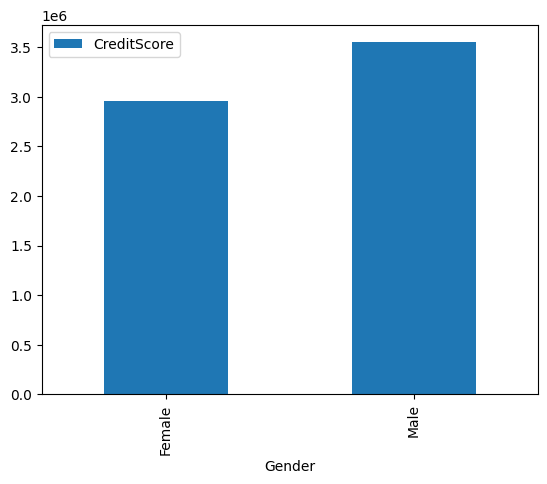

In [31]:
df.groupby(df.Gender).agg({"CreditScore":"sum"}).plot(kind="bar")

<Axes: xlabel='Gender'>

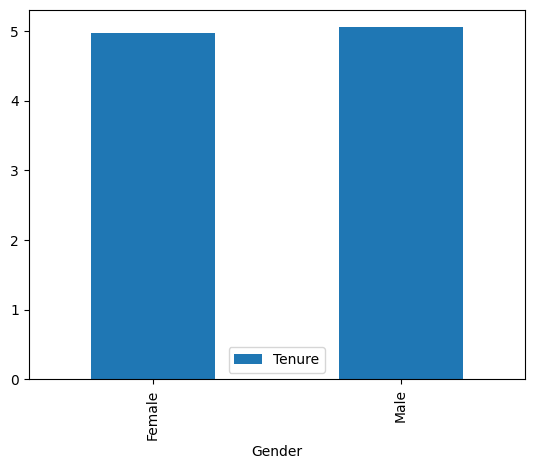

In [32]:
df.groupby(df.Gender).agg({"Tenure":"mean"}).plot(kind="bar")

In [33]:
df.drop("Surname", axis=1 , inplace=True)

In [34]:
# OneHotEncoder
# it convert your catgorical data in numerical in binary and not giving periorty like ordinalencoder

In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[['Gender', 'Geography']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
# now , joining with original data frame

In [37]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Gender', 'Geography']))

df = pd.concat([df.drop(['Gender', 'Geography'], axis=1), encoded_df], axis=1)

In [38]:
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1.0,1.0,0.0


In [39]:
X=df.drop("Exited" , axis=1)
y=df["Exited"]

In [40]:
# spliting 

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X ,y ,test_size=10 , random_state=56)

In [42]:
x_train.shape
x_test.shape

(10, 12)

In [43]:
# scaling 

In [44]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [45]:
x_train_scale

array([[-0.57644565,  0.98781174, -1.32754796, ...,  0.91233497,
        -0.57881436, -0.57372855],
       [ 1.56745887, -0.03634852,  1.15181431, ..., -1.09608864,
         1.72766966, -0.57372855],
       [-0.96426888, -1.19499447,  1.05645422, ..., -1.09608864,
        -0.57881436,  1.74298455],
       ...,
       [-1.62004195,  0.90505131, -0.37394709, ...,  0.91233497,
        -0.57881436, -0.57372855],
       [-0.61924367, -0.35704517,  2.58221562, ..., -1.09608864,
        -0.57881436, -0.57372855],
       [-0.44798207,  1.82576104,  2.01005509, ..., -1.09608864,
        -0.57881436, -0.57372855]])

In [46]:
import tensorflow as tf
import keras

In [47]:
# del model

In [48]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(12,),name="input"))
model.add(tf.keras.layers.Dense(108,activation="relu",name="dense1"))
model.add(tf.keras.layers.Dense(72,activation="relu",name="dense2"))
model.add(tf.keras.layers.Dense(48,activation="relu",name="dense3"))
model.add(tf.keras.layers.Dense(24,activation="relu",name="dense4"))
model.add(tf.keras.layers.Dense(16,activation="relu",name="dense5"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid",name="output"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                  │ (None, 108)            │         1,404 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 72)             │         7,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 48)             │         3,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense5 (Dense)                  │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,349 (56.05 KB)

 Trainable params: 14,349 (56.05 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# modele compile

# Compiling a model is the process of setting up the model with 
# the necessary components for training. 
# This includes defining how the model will learn from data and 
# evaluate its performance.

In [50]:
# model.compile(loss= 'binry_crossentropy' ,optimizer='Adam',metrics=["accuracy"])
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',     # Correct loss function identifier
    metrics=['accuracy']
)


In [51]:
# model fit

# tting a model means training it on your data. This is where the model 
# learns from the data by adjusting its weights to minimize the 
# loss function.

In [52]:
history =model.fit(x_train_scale ,y_train ,epochs=12,batch_size=50 , validation_split=0.05)

Epoch 1/12
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8005 - loss: 0.4953 - val_accuracy: 0.8380 - val_loss: 0.3789
Epoch 2/12
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8515 - loss: 0.3648 - val_accuracy: 0.8640 - val_loss: 0.3417
Epoch 3/12
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3345 - val_accuracy: 0.8640 - val_loss: 0.3462
Epoch 4/12
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3266 - val_accuracy: 0.8740 - val_loss: 0.3408
Epoch 5/12
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.3248 - val_accuracy: 0.8640 - val_loss: 0.3405
Epoch 6/12
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3236 - val_accuracy: 0.8720 - val_loss: 0.3303
Epoch 7/12
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3178 - val_accuracy: 0.8720 - val_loss: 0.3284
Epoch 8/12
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3141 - val_accuracy: 0.

In [53]:
model.layers[3].get_weights

<bound method Layer.get_weights of <Dense name=dense4, built=True>>

y_pre = np.where(x_pre>0.5,1,0)

In [54]:
x_pre=model.predict(x_test_scale)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [55]:
y_pre = np.where(x_pre>0.5,1,0)

In [56]:
from sklearn.metrics import*
acc=accuracy_score(y_test,y_pre)*100

print(f"accuracy of model is :{acc}")

accuracy of model is :80.0


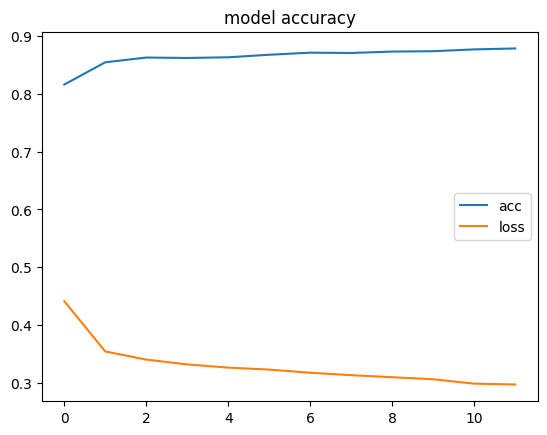

In [57]:
plt.plot(history.history['accuracy'],label="acc")
plt.plot(history.history['loss'],label="loss")
plt.legend()
plt.title('model accuracy')
plt.legend()
plt.show()


In [58]:
print(history.history.keys())



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


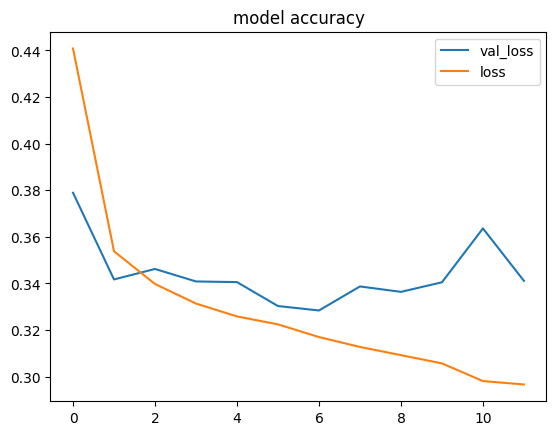

In [59]:
plt.plot(history.history['val_loss'],label="val_loss")
plt.plot(history.history['loss'],label="loss")
plt.legend()
plt.title('model accuracy')
plt.legend()
plt.show()


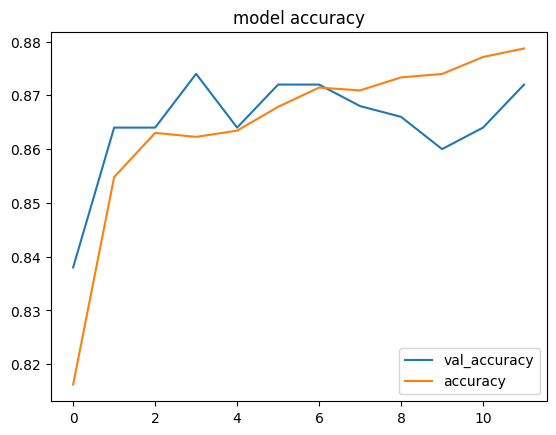

In [60]:
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.plot(history.history['accuracy'],label="accuracy")
plt.legend()
plt.title('model accuracy')
plt.legend()
plt.show()